In [105]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [106]:
from pandas_datareader import data #To read stock info off yahoo finance
from datetime import datetime #To set start and end date

In [107]:
tech_list = ['AAPL','MSFT','GOOG','AMZN']

In [108]:
end = datetime.now() #Setting the end date (now)

start = datetime(end.year-1,end.month,end.day) #Setting start date (exactly one year ago)

In [109]:
for stock in tech_list: #For every stock in my list
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)
    #globals sets the string name for the stock as a dataframe name

In [110]:
GOOG.describe()
#we will use adj closing price for historical data analysis

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1739.242417,1700.195301,1717.615157,1720.226537,1.659651e+06,1720.226537
std,283.202870,280.160803,281.076269,281.666606,5.899566e+05,281.666606
min,1327.660034,1299.000000,1308.229980,1320.609985,3.468000e+05,1320.609985
25%,1503.003052,1466.000000,1485.579956,1485.930054,1.289300e+06,1485.930054
50%,1661.699951,1625.750000,1647.890015,1644.410034,1.525200e+06,1644.410034
75%,1929.579956,1884.244995,1898.000000,1901.349976,1.828400e+06,1901.349976
max,2452.377930,2402.290039,2410.330078,2429.889893,4.329100e+06,2429.889893


In [111]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-04-30 to 2021-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


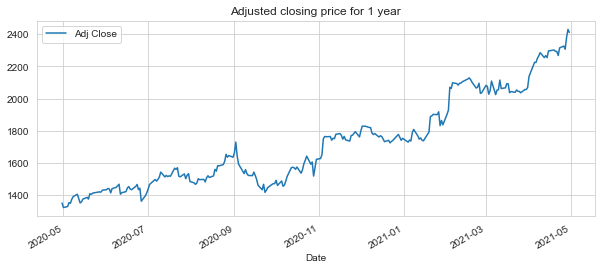

In [112]:
GOOG['Adj Close'].plot(title="Adjusted closing price for 1 year", legend=True,figsize=(10,4))

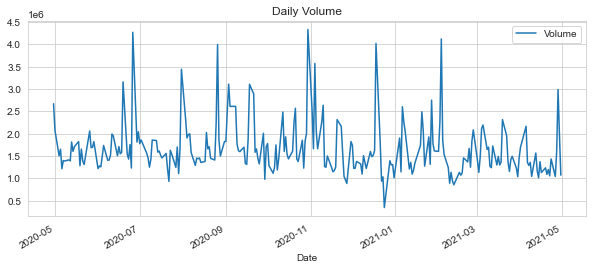

In [113]:
GOOG['Volume'].plot(title="Daily Volume",legend=True,figsize=(10,4))

In [114]:
#Calculating moving averages
#This is a techinical indicator that smooths out price trends by
#filtering out short-term price fluctuations.
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()
    

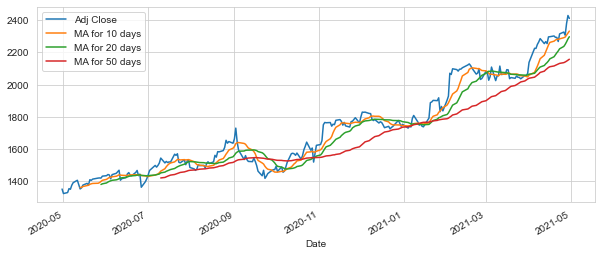

In [115]:
GOOG[['Adj Close', 'MA for 10 days','MA for 20 days', 'MA for 50 days']].plot(figsize=(10,4))

As the MA day range increases, the trend line gets smoother.

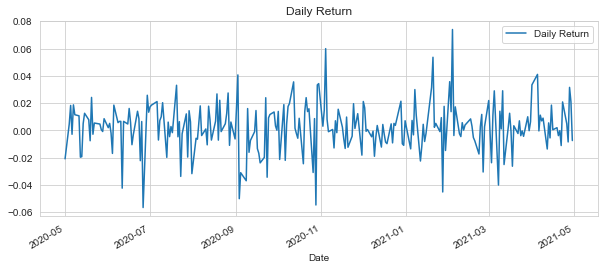

In [116]:
#Let's take a look at teh daily return for this stock.

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

GOOG['Daily Return'].plot(title='Daily Return',figsize=(10,4),legend=True)

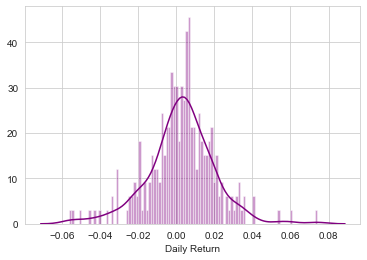

In [117]:
#distplot lets you have 2 plots on top of each other.
sns.distplot(GOOG['Daily Return'],bins=100,color='purple')

In [118]:
#Now I will analyse the returns for all the stocks I've imported.
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [119]:
closing_df.head()

Symbols,AAPL,MSFT,GOOG,AMZN
Date,,,,
2020-04-30,72.885025,177.407196,1348.660034,2474.000000
2020-05-01,71.711632,172.813858,1320.609985,2286.040039
2020-05-04,72.726265,177.040894,1326.800049,2315.989990
2020-05-05,73.817802,178.941589,1351.109985,2317.800049
2020-05-06,74.579391,180.703674,1347.300049,2351.260010


In [120]:
tech_returns = closing_df.pct_change()

In [121]:
tech_returns.head()

Symbols,AAPL,MSFT,GOOG,AMZN
Date,,,,
2020-04-30,NaN,NaN,NaN,NaN
2020-05-01,-0.016099,-0.025891,-0.020798,-0.075974
2020-05-04,0.014149,0.024460,0.004687,0.013101
2020-05-05,0.015009,0.010736,0.018322,0.000782
2020-05-06,0.010317,0.009847,-0.002820,0.014436


Here are the daily percentage returns for each stock.

C:\Users\neel\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


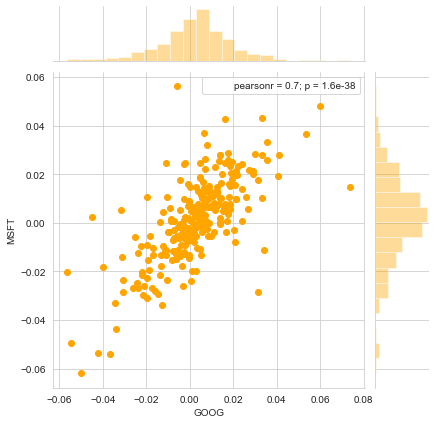

In [143]:
import scipy.stats as stats
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter',color='orange',stat_func=stats.pearsonr)


We can see that the 2 stocks are quite correlated, this is backed
by the pearsonr value of 0.7 (The closer to 1, the stronger the correlation).

In [ ]:
tech_returns.head()